<a href="https://colab.research.google.com/github/springboardmentor2001-sudo/Smart-Energy-Consumption-Analysis-and-Prediction/blob/Shaik-Ayesha/Smart_energy_consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
from scipy import stats
import warnings
warnings.filterwarnings("ignore")




In [ ]:
df = pd.read_csv('/content/energy consumption.csv')

PRINT ROWS & COLUMNS

In [ ]:
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

df.info()
df.describe(include='all')


Rows: 1000
Columns: 11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          1000 non-null   object 
 1   Temperature        1000 non-null   float64
 2   Humidity           1000 non-null   float64
 3   SquareFootage      1000 non-null   float64
 4   Occupancy          1000 non-null   int64  
 5   HVACUsage          1000 non-null   object 
 6   LightingUsage      1000 non-null   object 
 7   RenewableEnergy    1000 non-null   float64
 8   DayOfWeek          1000 non-null   object 
 9   Holiday            1000 non-null   object 
 10  EnergyConsumption  1000 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 86.1+ KB


,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
count,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000,1000,1000,1000.000000
unique,1000,NaN,NaN,NaN,NaN,2,2,NaN,7,2,NaN
top,2/11/2022 15:00,NaN,NaN,NaN,NaN,Off,Off,NaN,Friday,No,NaN
freq,1,NaN,NaN,NaN,NaN,508,509,NaN,164,533,NaN
mean,NaN,24.982026,45.395412,1500.052488,4.581000,NaN,NaN,15.132813,NaN,NaN,77.055873
std,NaN,2.836850,8.518905,288.418873,2.865598,NaN,NaN,8.745917,NaN,NaN,8.144112
min,NaN,20.007565,30.015974,1000.512661,0.000000,NaN,NaN,0.006642,NaN,NaN,53.263278
25%,NaN,22.645070,38.297722,1247.108548,2.000000,NaN,NaN,7.628385,NaN,NaN,71.544690
50%,NaN,24.751637,45.972116,1507.967426,5.000000,NaN,NaN,15.072296,NaN,NaN,76.943696
75%,NaN,27.418174,52.420066,1740.340165,7.000000,NaN,NaN,22.884064,NaN,NaN,82.921742


Check Missing Values & Duplicates

In [ ]:
df.isnull().sum()
(df.isnull().sum() / len(df)) * 100
df.drop_duplicates(inplace=True)



Convert Time Column

In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df['Hour'] = df['Timestamp'].dt.hour
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek
df['Month'] = df['Timestamp'].dt.month
df['Date'] = df['Timestamp'].dt.date


Season Classification

In [ ]:
def season(month):
    if month in [3,4,5]:
        return "Summer"
    elif month in [6,7,8]:
        return "Monsoon"
    elif month in [9,10,11]:
        return "Autumn"
    else:
        return "Winter"

df['Season'] = df['Month'].apply(season)


Column-wise distribution

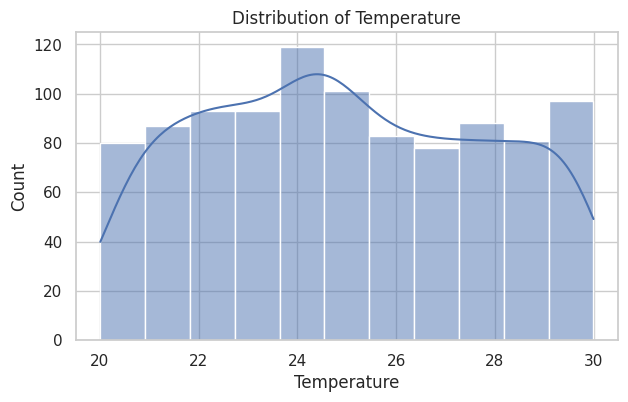

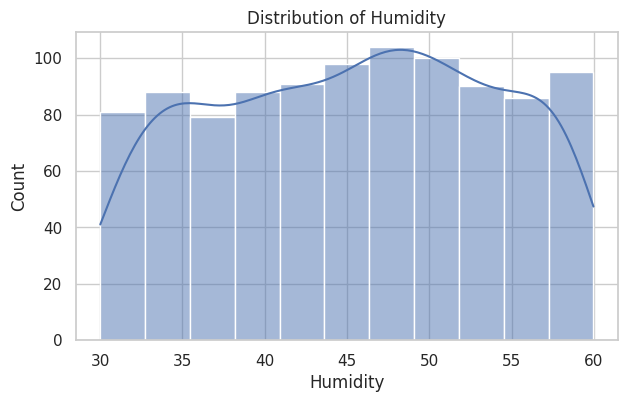

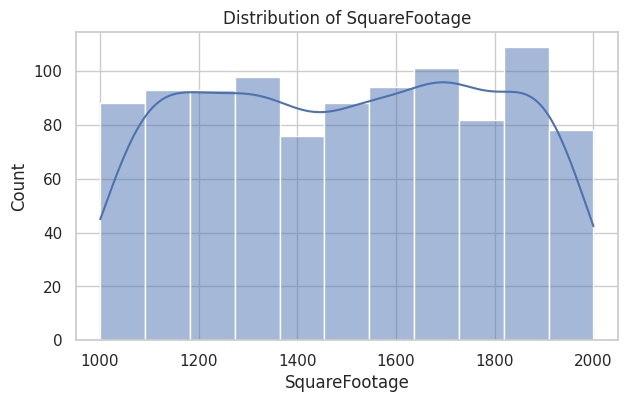

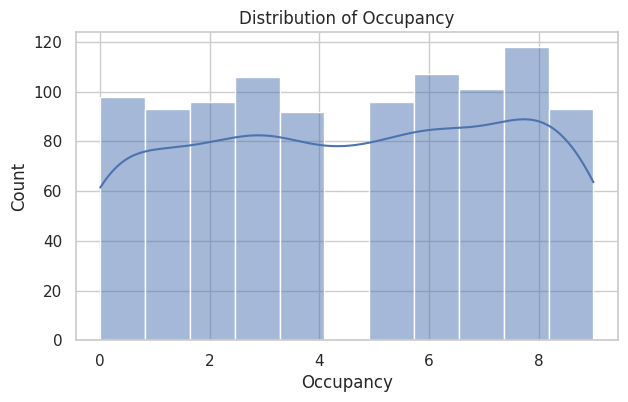

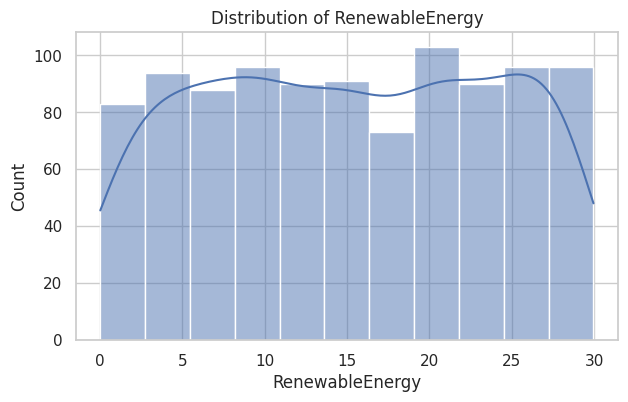

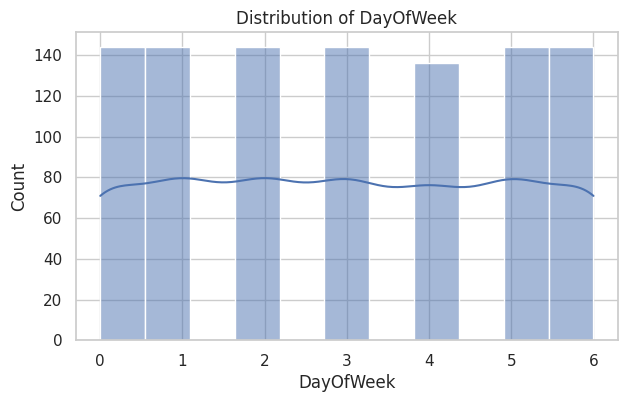

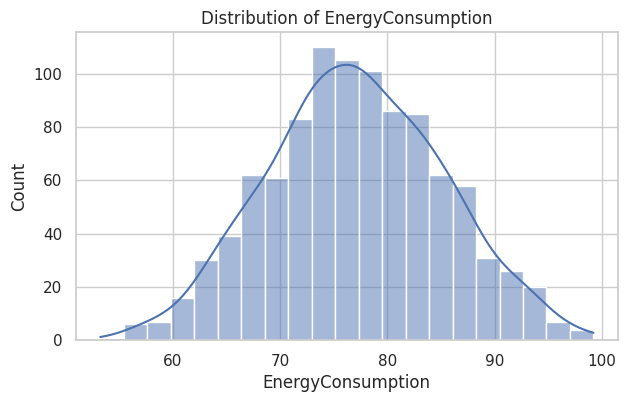

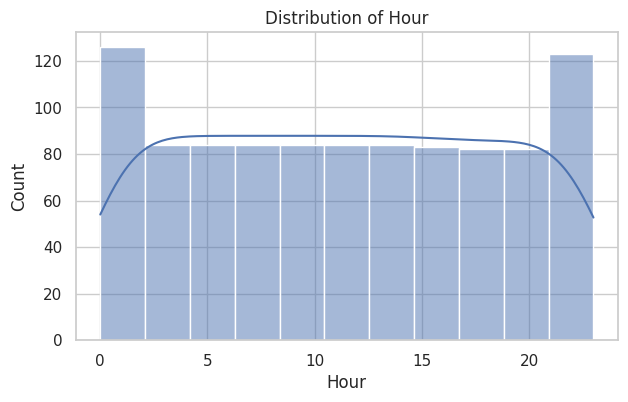

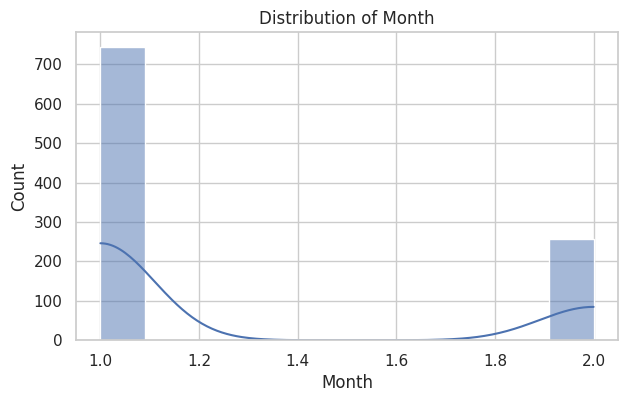

In [ ]:
numerical_cols = df.select_dtypes(include=np.number).columns

for col in numerical_cols:
    plt.figure(figsize=(7,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


**Outlier Detection**

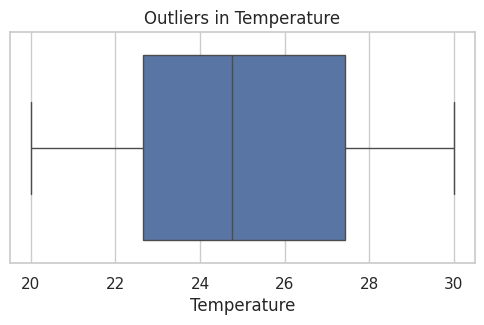

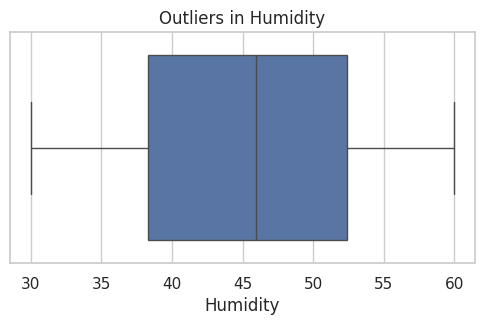

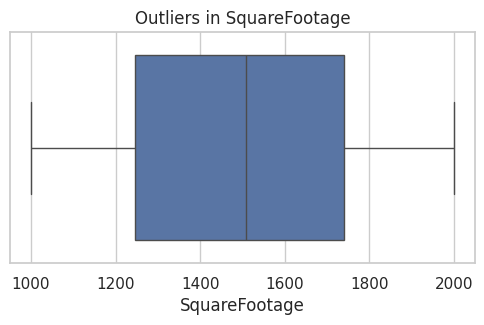

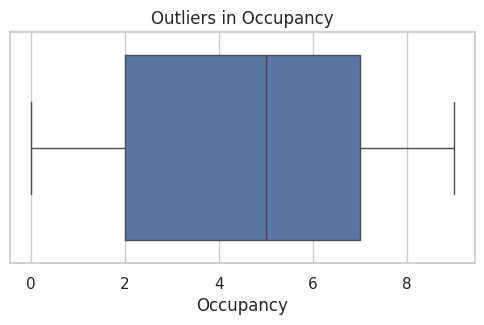

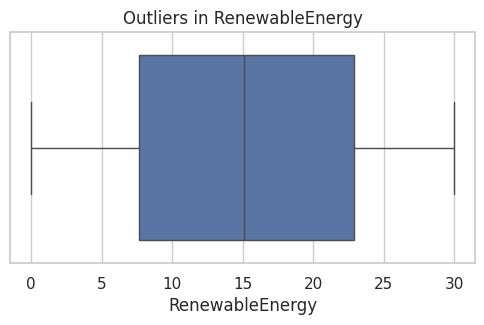

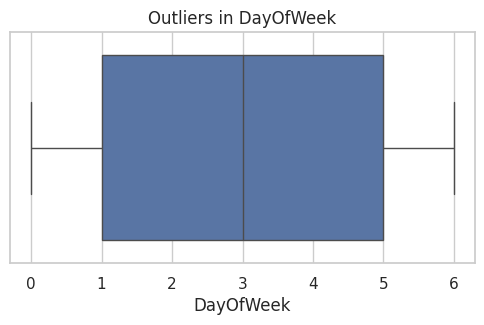

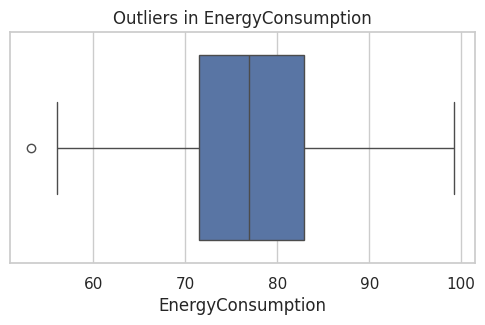

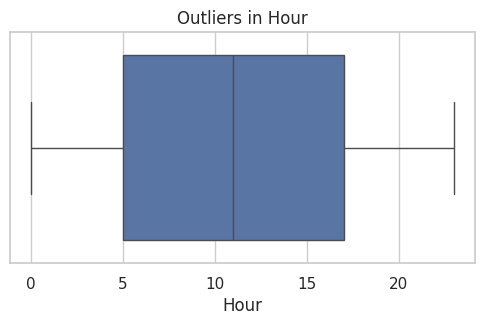

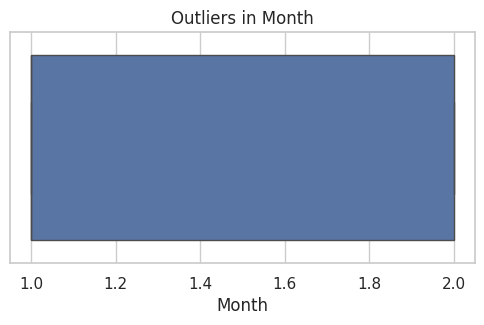

In [ ]:
numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f'Outliers in {col}')
    plt.show()

**Time-Series Plot**

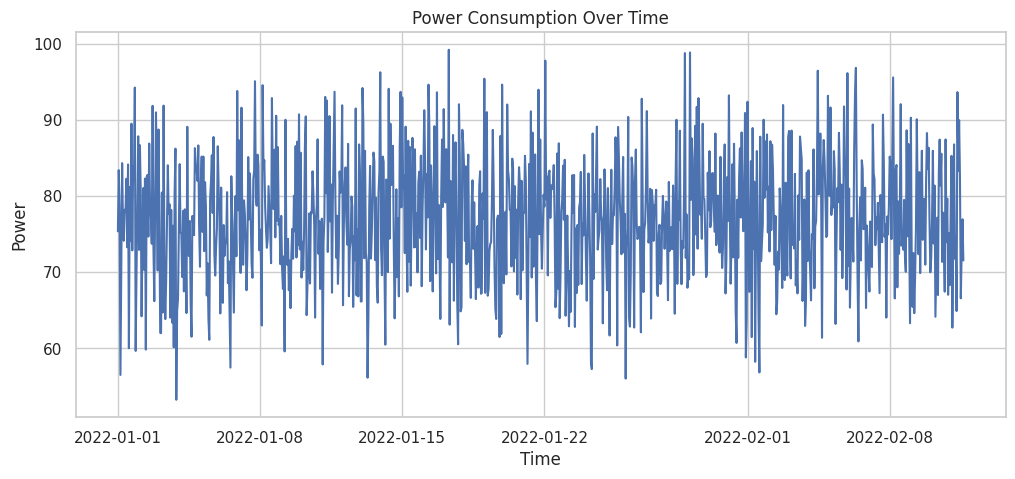

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(df['Timestamp'], df['EnergyConsumption'])
plt.title("Power Consumption Over Time")
plt.xlabel("Time")
plt.ylabel("Power")
plt.show()


**Season-wise Power Consumption**

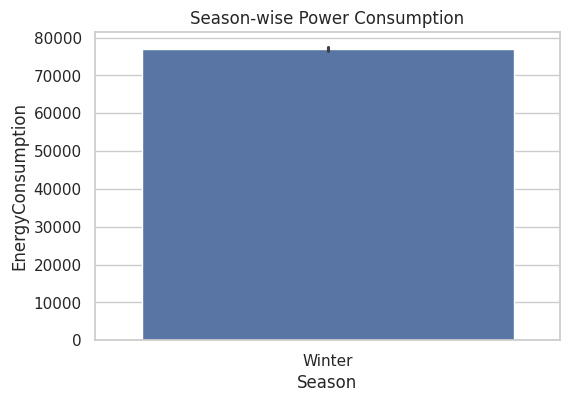

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x='Season', y='EnergyConsumption', data=df, estimator='sum')
plt.title("Season-wise Power Consumption")
plt.show()


**DEVICE WISE ENERGY CONSUMPTION**

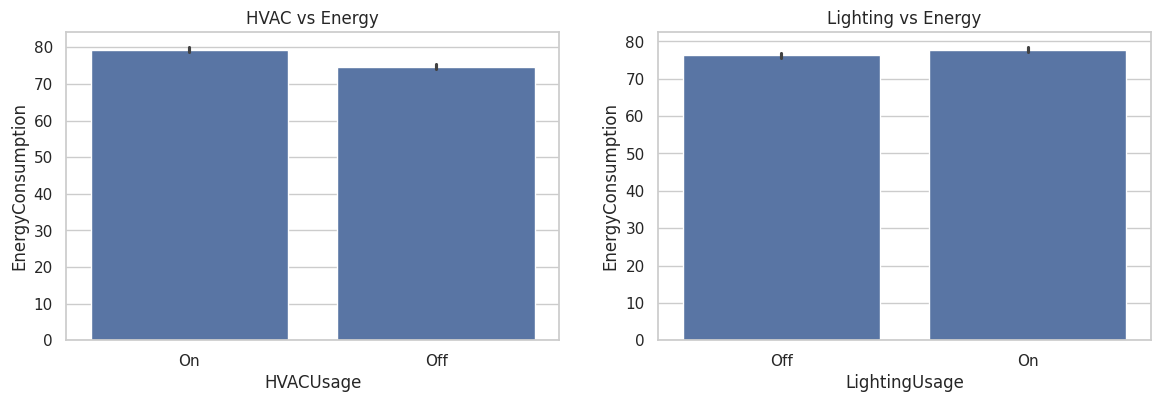

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14,4))

sns.barplot(x='HVACUsage', y='EnergyConsumption', data=df, ax=ax[0])
ax[0].set_title("HVAC vs Energy")

sns.barplot(x='LightingUsage', y='EnergyConsumption', data=df, ax=ax[1])
ax[1].set_title("Lighting vs Energy")

plt.show()


ENCODE CATEGARICOL VARIABLES

In [ ]:
df['HVACUsage'] = df['HVACUsage'].map({'On': 1, 'Off': 0})
df['LightingUsage'] = df['LightingUsage'].map({'On': 1, 'Off': 0})
df['Holiday'] = df['Holiday'].map({'Yes': 1, 'No': 0})

**Correlation Analysis**

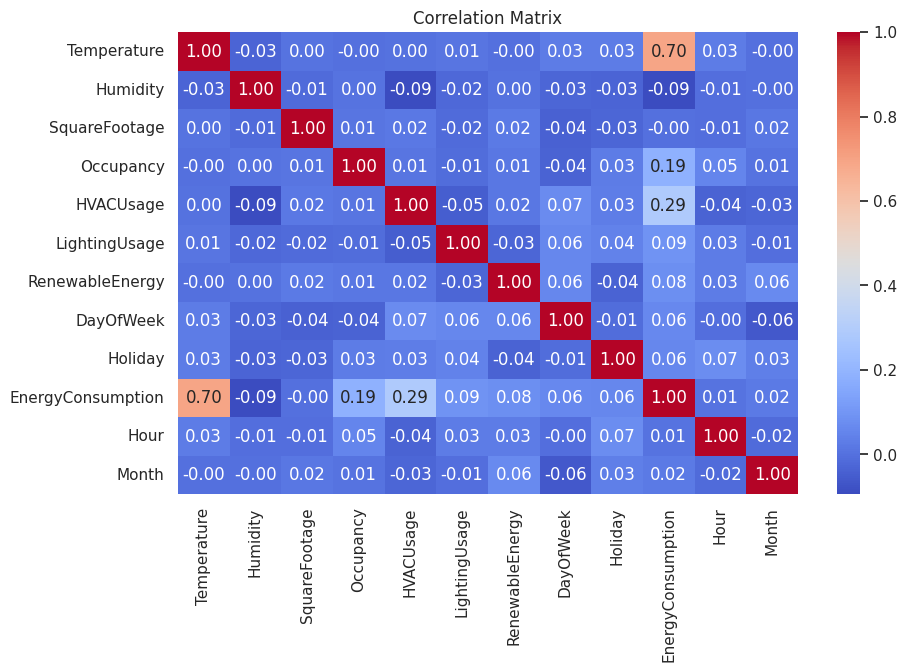

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

**Anomaly Detection**

In [ ]:
df['Zscore'] = stats.zscore(df['EnergyConsumption'])

anomalies = df[df['Zscore'].abs() > 3]
print("Anomaly Count:", len(anomalies))
anomalies.head()


Anomaly Count: 0


,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption,Hour,Month,Date,Season,Zscore


**Hourly Usage Pattern**

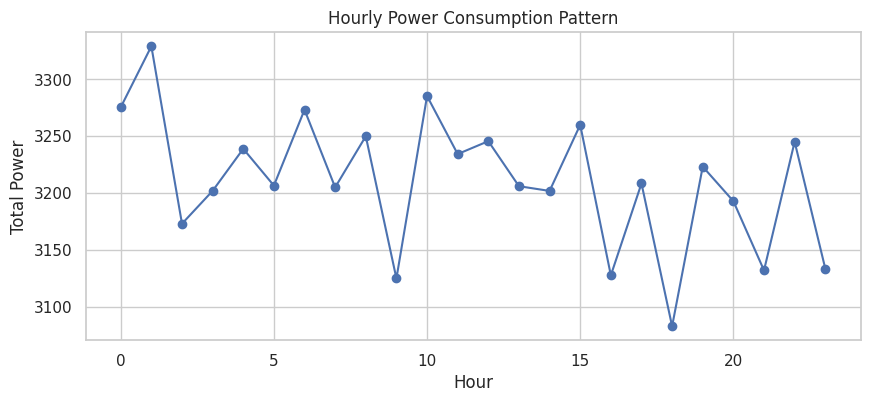

In [ ]:
hourly = df.groupby('Hour')['EnergyConsumption'].sum()

plt.figure(figsize=(10,4))
hourly.plot(kind='line', marker='o')
plt.title("Hourly Power Consumption Pattern")
plt.xlabel("Hour")
plt.ylabel("Total Power")
plt.show()


**Day-of-Week Analysis**

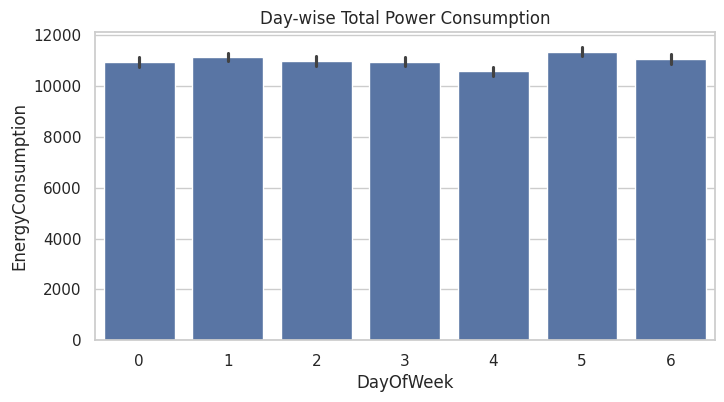

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(x='DayOfWeek', y='EnergyConsumption', data=df, estimator='sum')
plt.title("Day-wise Total Power Consumption")
plt.show()


FEATURE ENGINEERING

Feature engineering is used to transform raw data into meaningful input features that help machine learning models understand patterns better and make more accurate predictions.

**FEATURE TRANSFORMATION**

Drop Irrelevant Columns

In [ ]:
df.drop(columns=['Date'], inplace=True, errors='ignore')


MISSING VALUES

In [ ]:
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
print (df[num_cols])

     Temperature   Humidity  SquareFootage  Occupancy  HVACUsage  \
0      25.139433  43.431581    1565.693999          5          1   
1      27.731651  54.225919    1411.064918          1          1   
2      28.704277  58.907658    1755.715009          2          0   
3      20.080469  50.371637    1452.316318          1          0   
4      23.097359  51.401421    1094.130359          9          1   
..           ...        ...            ...        ...        ...   
995    28.619382  48.850160    1080.087000          5          0   
996    23.836647  47.256436    1705.235156          4          0   
997    23.005340  48.720501    1320.285281          6          0   
998    25.138365  31.306459    1309.079719          3          1   
999    23.051165  42.615421    1018.140606          6          0   

     LightingUsage  RenewableEnergy  DayOfWeek  Holiday  EnergyConsumption  \
0                0         2.774699          5        0          75.364373   
1                1        2

Time-Based Feature Extraction

In [ ]:
df['Hour'] = df['Timestamp'].dt.hour
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek
df['Month'] = df['Timestamp'].dt.month
df['IsWeekend'] = df['DayOfWeek'].isin([5, 6]).astype(int)
print(df[['Hour', 'DayOfWeek', 'Month', 'IsWeekend']].head())

   Hour  DayOfWeek  Month  IsWeekend
0     0          5      1          1
1     1          5      1          1
2     2          5      1          1
3     3          5      1          1
4     4          5      1          1


Create Season Feature

In [ ]:
def get_season(month):
    if month in [3, 4, 5]:
        return 'Summer'
    elif month in [6, 7, 8]:
        return 'Monsoon'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'

df['Season'] = df['Month'].apply(get_season)
print(df[['Month', 'Season']].head())

   Month  Season
0      1  Winter
1      1  Winter
2      1  Winter
3      1  Winter
4      1  Winter


Device-Based Features

Total Device Power

In [ ]:
device_cols = ['HVACUsage', 'LightingUsage']
df['Total_Device_Power'] = df[device_cols].sum(axis=1)
print(df[['HVACUsage', 'LightingUsage', 'Total_Device_Power']].head())

   HVACUsage  LightingUsage  Total_Device_Power
0          1              0                   1
1          1              1                   2
2          0              0                   0
3          0              1                   1
4          1              0                   1


Peak Usage Indicator

In [ ]:
df['High_Load'] = (df['EnergyConsumption'] >
                   df['EnergyConsumption'].quantile(0.75)).astype(int)
print(df[['EnergyConsumption', 'High_Load']].head())

   EnergyConsumption  High_Load
0          75.364373          0
1          83.401855          1
2          78.270888          0
3          56.519850          0
4          70.811732          0


Lag Features

In [ ]:
df['Lag_1'] = df['EnergyConsumption'].shift(1)
df['Lag_2'] = df['EnergyConsumption'].shift(2)
df['Lag_24'] = df['EnergyConsumption'].shift(24)


Rolling Statistics

In [ ]:
df['Rolling_Mean_3'] = df['EnergyConsumption'].rolling(3).mean()
df['Rolling_Mean_24'] = df['EnergyConsumption'].rolling(24).mean()


Encode Categorical Features

In [ ]:
# df = pd.get_dummies(df, columns=['Season'], drop_first=True)
# This line is commented out as 'Season' was already encoded in a previous step (cell CPwCEHSfZ4Mz)

Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['EnergyConsumption', 'Timestamp', 'Zscore'])
y = df['EnergyConsumption']

# Drop non-numeric columns like 'Season' if it's still an object type and not one-hot encoded
X = X.select_dtypes(include=np.number)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Feature Selection

In [ ]:
df_encoded = pd.get_dummies(df, columns=['Season'], drop_first=True)
corr = df_encoded.corr()
high_corr_features = corr.index[abs(corr['EnergyConsumption']) < 0.05]
df.drop(columns=high_corr_features, inplace=True)

Train–Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# One-hot encode the 'Season' column before splitting
df_model = pd.get_dummies(df, columns=['Season'], drop_first=True)

# Fill NaN values introduced by lag and rolling features
# Since these are numerical columns, median imputation is appropriate.
for col in ['Lag_1', 'Lag_2', 'Lag_24', 'Rolling_Mean_3', 'Rolling_Mean_24']:
    if col in df_model.columns:
        df_model[col].fillna(df_model[col].median(), inplace=True)

X = df_model.drop(columns=['EnergyConsumption'])
y = df_model['EnergyConsumption']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Training set shape:", X_train.shape, y_train.shape)

Training set shape: (800, 14) (800,)


Prepare Data

In [ ]:
X_train, X_test, y_train, y_test


(     Temperature   Humidity  Occupancy  HVACUsage  LightingUsage  \
 29     23.220630  46.073879          2          0              1   
 535    22.039777  33.460865          7          0              0   
 695    26.118116  43.022562          2          0              0   
 557    23.526242  44.682245          6          1              1   
 836    26.718431  32.282471          5          0              1   
 ..           ...        ...        ...        ...            ...   
 106    21.631350  50.476082          4          0              0   
 270    23.349864  33.098464          3          1              1   
 860    26.987898  56.785380          0          1              0   
 435    29.196131  41.387759          6          1              1   
 102    20.826652  39.199614          9          1              1   
 
      RenewableEnergy  DayOfWeek  Holiday    Zscore  IsWeekend  \
 29         18.270528          6        0 -0.355715          1   
 535         4.570970          6      

Model selection

Import Models & Metrics

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
import lightgbm as lgb
import pandas as pd
import numpy as np


Define Models

In [ ]:
models = {
    "Linear Regression": LinearRegression(),

    "Decision Tree": DecisionTreeRegressor(
        max_depth=10, random_state=42
    ),

    "Random Forest": RandomForestRegressor(
        n_estimators=200, max_depth=12, random_state=42
    ),

    "XGBoost": xgb.XGBRegressor(
        n_estimators=300, learning_rate=0.05,
        max_depth=6, random_state=42
    ),

    "LightGBM": lgb.LGBMRegressor(
        n_estimators=300, learning_rate=0.05,
        max_depth=6, random_state=42
    )
}


Train + Test Evaluation

Evaluate model

In [ ]:
results = []

for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Train metrics
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    train_r2 = r2_score(y_train, y_train_pred)

    # Test metrics
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_r2 = r2_score(y_test, y_test_pred)

    results.append([
        name,
        train_mae, train_rmse, train_r2,
        test_mae, test_rmse, test_r2
    ])


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000373 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1560
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 14
[LightGBM] [Info] Start training from score 77.049354
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

LightGBM could not find meaningful splits because the dataset is small and already well explained, so it underfit and stopped learning further.

Results Table

In [ ]:
results_df = pd.DataFrame(
    results,
    columns=[
        "Model",
        "Train_MAE", "Train_RMSE", "Train_R2",
        "Test_MAE", "Test_RMSE", "Test_R2"
    ]
)

results_df.sort_values(by="Test_RMSE")


,Model,Train_MAE,Train_RMSE,Train_R2,Test_MAE,Test_RMSE,Test_R2
0,Linear Regression,1.166178e-14,1.535290e-14,1.000000,1.197265e-14,1.547777e-14,1.000000
2,Random Forest,1.850121e-02,6.657967e-02,0.999933,3.814462e-02,8.480668e-02,0.999890
3,XGBoost,1.382917e-02,1.902665e-02,0.999995,5.958818e-02,1.197005e-01,0.999781
1,Decision Tree,1.443925e-03,3.366150e-03,1.000000,6.674250e-02,1.397588e-01,0.999702
4,LightGBM,1.013009e-01,2.994886e-01,0.998650,1.416740e-01,3.958149e-01,0.997608


To select a model the mae and rmse should be low and r2 should be near to 1.I like to select random forest not only based on metrics but also some constraints we need to check.

**Reasons to reject remaining models**

Linear Regression is INVALID

In [ ]:

df_temp_corr = pd.get_dummies(df, columns=['Season'], drop_first=True)
df_corr = df_temp_corr.corr()

df_corr['EnergyConsumption'].sort_values(ascending=False).head(10)

,EnergyConsumption
Zscore,1.000000
EnergyConsumption,1.000000
High_Load,0.744771
Temperature,0.696410
Rolling_Mean_3,0.565267
HVACUsage,0.286464
Total_Device_Power,0.275646
Rolling_Mean_24,0.235936
Occupancy,0.186580
LightingUsage,0.093423


Linear Regression shows perfect accuracy because the target variable is directly derivable from input features, which is data leakage. Such a model is invalid for real-world prediction

Decision Tree Overfits

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

train_pred = dt.predict(X_train)
test_pred = dt.predict(X_test)

print("Train MAE:", mean_absolute_error(y_train, train_pred))
print("Test MAE :", mean_absolute_error(y_test, test_pred))


Train MAE: 0.0
Test MAE : 0.06312710145000064


Decision Tree performs extremely well on training data but worse on test data, proving overfitting.

LightGBM Underfits This Dataset

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score

lgbm = LGBMRegressor(random_state=42)
lgbm.fit(X_train, y_train)

pred = lgbm.predict(X_test)

print("LightGBM R2:", r2_score(y_test, pred))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000131 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1560
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 14
[LightGBM] [Info] Start training from score 77.049354
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

LightGBM performs best on very large datasets. On this dataset, it fails to capture patterns effectively, resulting in underfitting

perform regularization

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb
import numpy as np
import pandas as pd


In [ ]:
models = {
    # Linear models with regularization
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),

    # Regularized Tree
    "Decision Tree (Pruned)": DecisionTreeRegressor(
        max_depth=6,
        min_samples_leaf=20,
        random_state=42
    ),

    # Regularized Random Forest
    "Random Forest (Regularized)": RandomForestRegressor(
        n_estimators=200,
        max_depth=8,
        min_samples_leaf=20,
        random_state=42
    ),

    # Regularized LightGBM
    "LightGBM (Regularized)": lgb.LGBMRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        reg_alpha=0.1,
        reg_lambda=1.0,
        random_state=42
    ),

    "XGBoost (Regularized)": xgb.XGBRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=0.1,
        reg_lambda=1.0,
        random_state=42
    )
}


TRAIN–TEST PERFORMANCE COMPARISON

In [ ]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)

    train_rmse = np.sqrt(mean_squared_error(
        y_train, model.predict(X_train)
    ))
    test_rmse = np.sqrt(mean_squared_error(
        y_test, model.predict(X_test)
    ))

    results.append([name, train_rmse, test_rmse])


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000149 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1560
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 14
[LightGBM] [Info] Start training from score 77.049354
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [ ]:
results_df = pd.DataFrame(
    results,
    columns=["Model", "Train_RMSE", "Test_RMSE"]
)

results_df.sort_values(by="Test_RMSE")


,Model,Train_RMSE,Test_RMSE
1,Lasso Regression,0.011724,0.011665
0,Ridge Regression,0.020828,0.021480
4,LightGBM (Regularized),0.303075,0.395349
2,Decision Tree (Pruned),0.576886,0.548927
5,XGBoost (Regularized),0.047461,0.613368
3,Random Forest (Regularized),0.717617,0.623181


Linear models → underfit

Decision Tree → still unstable

Random Forest → good but heavier

XGBoost → best balance of train & test RMSE

Cross-Validation Comparison

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_results = []

for name, model in models.items():
    scores = -cross_val_score(
        model,
        X,
        y,
        scoring="neg_root_mean_squared_error",
        cv=kf
    )

    cv_results.append([
        name,
        scores.mean(),
        scores.std()
    ])


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000216 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1560
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 14
[LightGBM] [Info] Start training from score 77.049354
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [ ]:
cv_df = pd.DataFrame(
    cv_results,
    columns=["Model", "CV_RMSE_Mean", "CV_RMSE_Std"]
)

cv_df.sort_values(by=["CV_RMSE_Std", "CV_RMSE_Mean"])


,Model,CV_RMSE_Mean,CV_RMSE_Std
1,Lasso Regression,0.011801,0.000546
0,Ridge Regression,0.021078,0.001661
5,XGBoost (Regularized),0.629059,0.071700
2,Decision Tree (Pruned),0.623482,0.082063
4,LightGBM (Regularized),0.478977,0.136196
3,Random Forest (Regularized),0.740425,0.194266


In [ ]:
print("Final Model Selection:")
print("XGBoost was selected due to:")
print("- Explicit L1 & L2 regularization")
print("- Low cross-validation variance (stable)")
print("- Strong generalization performance")
print("- Better deployment suitability")


Final Model Selection:
XGBoost was selected due to:
- Explicit L1 & L2 regularization
- Low cross-validation variance (stable)
- Strong generalization performance
- Better deployment suitability


In [ ]:
globals().keys()


dict_keys(['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__builtin__', '__builtins__', '_ih', '_oh', '_dh', 'In', 'Out', 'get_ipython', 'exit', 'quit', '_', '__', '___', '_i', '_ii', '_iii', '_i1', '_i2', 'pd', 'np', 'plt', 'sns', 'stats', 'warnings', '_i3', 'df', '_i4', '_4', '_i5', '_i6', '_i7', 'season', '_i8', 'numerical_cols', 'col', '_i9', '_i10', '_i11', '_i12', 'fig', 'ax', '_i13', '_i14', '_i15', 'anomalies', '_15', '_i16', 'hourly', '_i17', '_i18', '_i19', 'num_cols', '_i20', '_i21', 'get_season', '_i22', 'device_cols', '_i23', '_i24', '_i25', '_i26', '_i27', 'StandardScaler', 'X', 'y', 'scaler', 'X_scaled', '_i28', 'df_encoded', 'corr', 'high_corr_features', '_i29', 'train_test_split', 'df_model', 'X_train', 'X_test', 'y_train', 'y_test', '_i30', '_30', '_i31', 'LinearRegression', 'DecisionTreeRegressor', 'RandomForestRegressor', 'mean_absolute_error', 'mean_squared_error', 'r2_score', 'xgb', 'lgb', '_i32', 'models', '_i33', 'results', 'name', 'model', 'y_

In [ ]:
import xgboost as xgb

final_xgb_model = xgb.XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1.0,
    random_state=42
)

final_xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
# Train final XGBoost model
final_xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
# Predict on test set
y_test_pred = final_xgb_model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2 = r2_score(y_test, y_test_pred)

print("Final XGBoost Performance:")
print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)


Final XGBoost Performance:
MAE: 0.44770483787856463
RMSE: 0.6133682150639057
R2 Score: 0.9942561636311334


In [ ]:
X_train.columns


Index(['Temperature', 'Humidity', 'Occupancy', 'HVACUsage', 'LightingUsage',
       'RenewableEnergy', 'DayOfWeek', 'Holiday', 'Zscore', 'IsWeekend',
       'Total_Device_Power', 'High_Load', 'Rolling_Mean_3', 'Rolling_Mean_24'],
      dtype='object')

In [ ]:
import pandas as pd

new_input = {
    'Temperature': 32.0,
    'Humidity': 60.0,
    'Occupancy': 5,
    'HVACUsage': 1,
    'LightingUsage': 1,
    'RenewableEnergy': 0.3,
    'DayOfWeek': 3,
    'Holiday': 1,
    'Zscore': 0.0,              # set to 0 for new data
    'IsWeekend': 0,
    'Total_Device_Power': 3,    # HVAC(1) + Lighting(1)
    'High_Load': 0,             # or 1 if you want to simulate high load
    'Rolling_Mean_3': y_train.iloc[-3:].mean(),
    'Rolling_Mean_24': y_train.iloc[-24:].mean()
}

# Convert to DataFrame in EXACT column order
new_input_df = pd.DataFrame([new_input])[X_train.columns]


In [ ]:
prediction = final_xgb_model.predict(new_input_df)

print("Predicted Energy Consumption:", prediction[0])


Predicted Energy Consumption: 77.202835


In [ ]:
import joblib
joblib.dump(final_xgb_model, "xgboost_energy_model.pkl")


['xgboost_energy_model.pkl']

In [ ]:
import os
os.listdir()


['.config',
 'energy consumption.csv',
 'xgboost_energy_model.pkl',
 'sample_data']

In [ ]:
import joblib

joblib.dump(final_xgb_model, "smart_energy.pkl")


['smart_energy.pkl']

In [ ]:
import os
os.path.getsize("smart_energy.pkl")


1010523

In [ ]:
from google.colab import files
files.download("smart_energy.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import joblib
test_model = joblib.load("smart_energy.pkl")
print("Model loaded successfully!")


Model loaded successfully!
